# Neural Network

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import pandas as pd

Read the dataset and assign it to the test_path and train_path variables

In [4]:
from PIL import Image
test_path = 'C:/Users/user/Desktop/Dataset/asl/asl_alphabet_test/asl_alphabet_test'
train_path = 'C:/Users/user/Desktop/Dataset/asl/asl_alphabet_train/'

Number of elements of each dataset classes

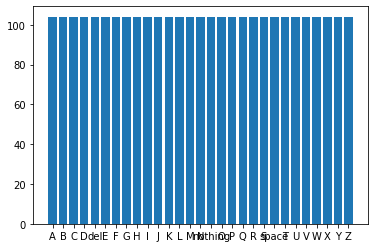

In [5]:
classes = os.listdir(train_path)
nos = []
for i in classes:
    nos.append(len(os.listdir(train_path+i)))
    
plt.bar(classes, nos)
plt.show()

In [6]:
img = image.load_img("C:/Users/user/Desktop/Dataset/asl/asl_alphabet_train/A/A1.jpg")

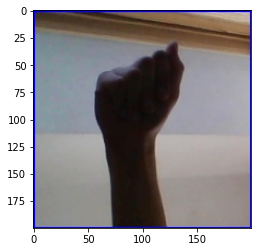

In [7]:
plt.imshow(img)

Photos of each dataset classes

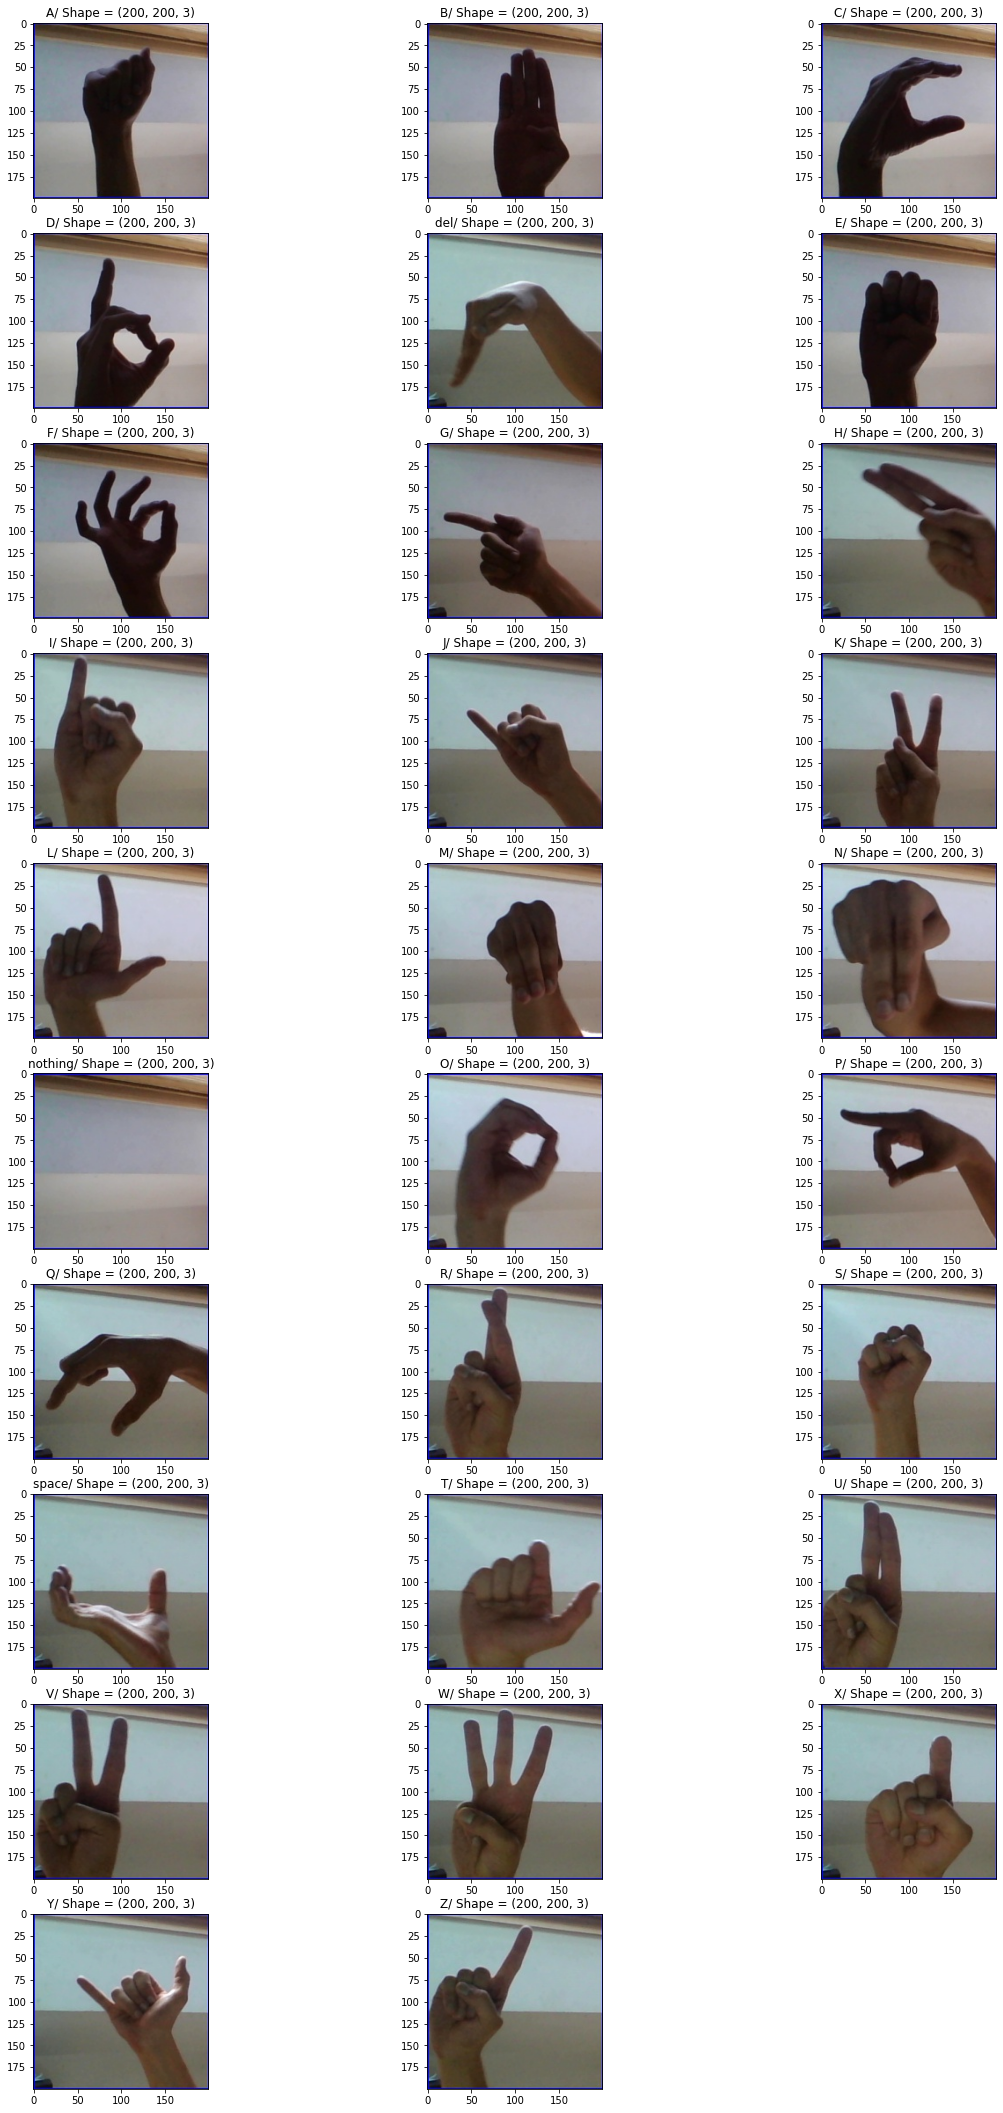

In [11]:
plt.figure(figsize=(20,38))
for i in enumerate(classes):
    image = os.listdir(train_path+i[1])[0]
    image = Image.open(train_path+i[1]+'/'+image)
    image = np.asarray(image)
    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)
    plt.title('{0}/ Shape = {1}'.format(i[1], image.shape))
plt.show()

for Standardization and validation and training, I use the ImageDataGenerator command

In [12]:
train = ImageDataGenerator(rescale=1/255, validation_split=0.1)
test = ImageDataGenerator(rescale=1/255)

using the following commands, I split the datasheet into the desired format

In [13]:
train_dataset = train.flow_from_directory(directory='C:/Users/user/Desktop/Dataset/asl/asl_alphabet_train/', 
                                         target_size=(200, 200),
                                         batch_size=100,
                                         class_mode='categorical',
                                         subset='training',
                                         color_mode = 'rgb',
                                         shuffle = True,
                                        )

Found 2726 images belonging to 29 classes.


In [14]:
valid_dataset = train.flow_from_directory(directory='C:/Users/user/Desktop/Dataset/asl/asl_alphabet_train/', 
                                         target_size=(200, 200),
                                         batch_size=100,
                                         class_mode='categorical',
                                         subset='validation',
                                         color_mode = 'rgb',
                                         shuffle = True,
                                        )

Found 290 images belonging to 29 classes.


Dataset classes

In [15]:
train_dataset.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.models import Model

In [17]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(200,200,3)),
    MaxPooling2D(3,3),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(3,3),
    
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(3,3),
    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(3,3),

    Flatten(),
    
    Dense(1024, activation = 'relu'),
    Dropout(0.2),
    Dense(512, activation = 'relu'),
    Dropout(0.4),
    Dense(256, activation = 'relu'),
    Dropout(0.2),
    Dense(29, activation = 'softmax')
])

Model parameters values

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 66, 66, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         2

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

Training neural network

In [20]:
history = model.fit(train_dataset,validation_data=valid_dataset,
          epochs=10,
          verbose=2)

Epoch 1/10
28/28 - 15s - loss: 3.3411 - accuracy: 0.0356 - val_loss: 3.0730 - val_accuracy: 0.0552
Epoch 2/10
28/28 - 3s - loss: 2.4632 - accuracy: 0.2392 - val_loss: 1.6623 - val_accuracy: 0.5172
Epoch 3/10
28/28 - 3s - loss: 1.1875 - accuracy: 0.6071 - val_loss: 0.7870 - val_accuracy: 0.7000
Epoch 4/10
28/28 - 3s - loss: 0.3595 - accuracy: 0.8771 - val_loss: 0.3258 - val_accuracy: 0.8862
Epoch 5/10
28/28 - 3s - loss: 0.1173 - accuracy: 0.9655 - val_loss: 0.1017 - val_accuracy: 0.9690
Epoch 6/10
28/28 - 3s - loss: 0.0493 - accuracy: 0.9861 - val_loss: 0.0736 - val_accuracy: 0.9793
Epoch 7/10
28/28 - 3s - loss: 0.0310 - accuracy: 0.9894 - val_loss: 0.1892 - val_accuracy: 0.9517
Epoch 8/10
28/28 - 3s - loss: 0.0302 - accuracy: 0.9923 - val_loss: 0.1282 - val_accuracy: 0.9586
Epoch 9/10
28/28 - 3s - loss: 0.0338 - accuracy: 0.9912 - val_loss: 0.2989 - val_accuracy: 0.9414
Epoch 10/10
28/28 - 3s - loss: 0.0244 - accuracy: 0.9916 - val_loss: 0.0699 - val_accuracy: 0.9655


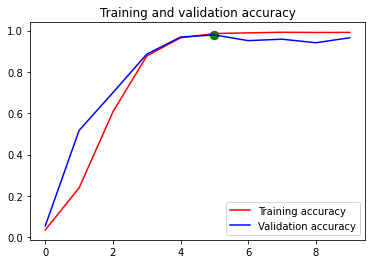

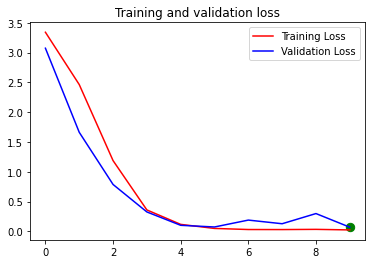

In [22]:
%matplotlib inline
acc = np.array(history.history['accuracy'])
val_acc = np.array(history.history['val_accuracy'])
loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

epochs = np.arange(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.scatter(epochs[val_acc.argmax()], val_acc.max(), color='green', s=70)
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.scatter(epochs[val_loss.argmin()], val_loss.min(), color='green', s=70)
plt.title('Training and validation loss')
plt.legend()

plt.show()

Forecast of the test part

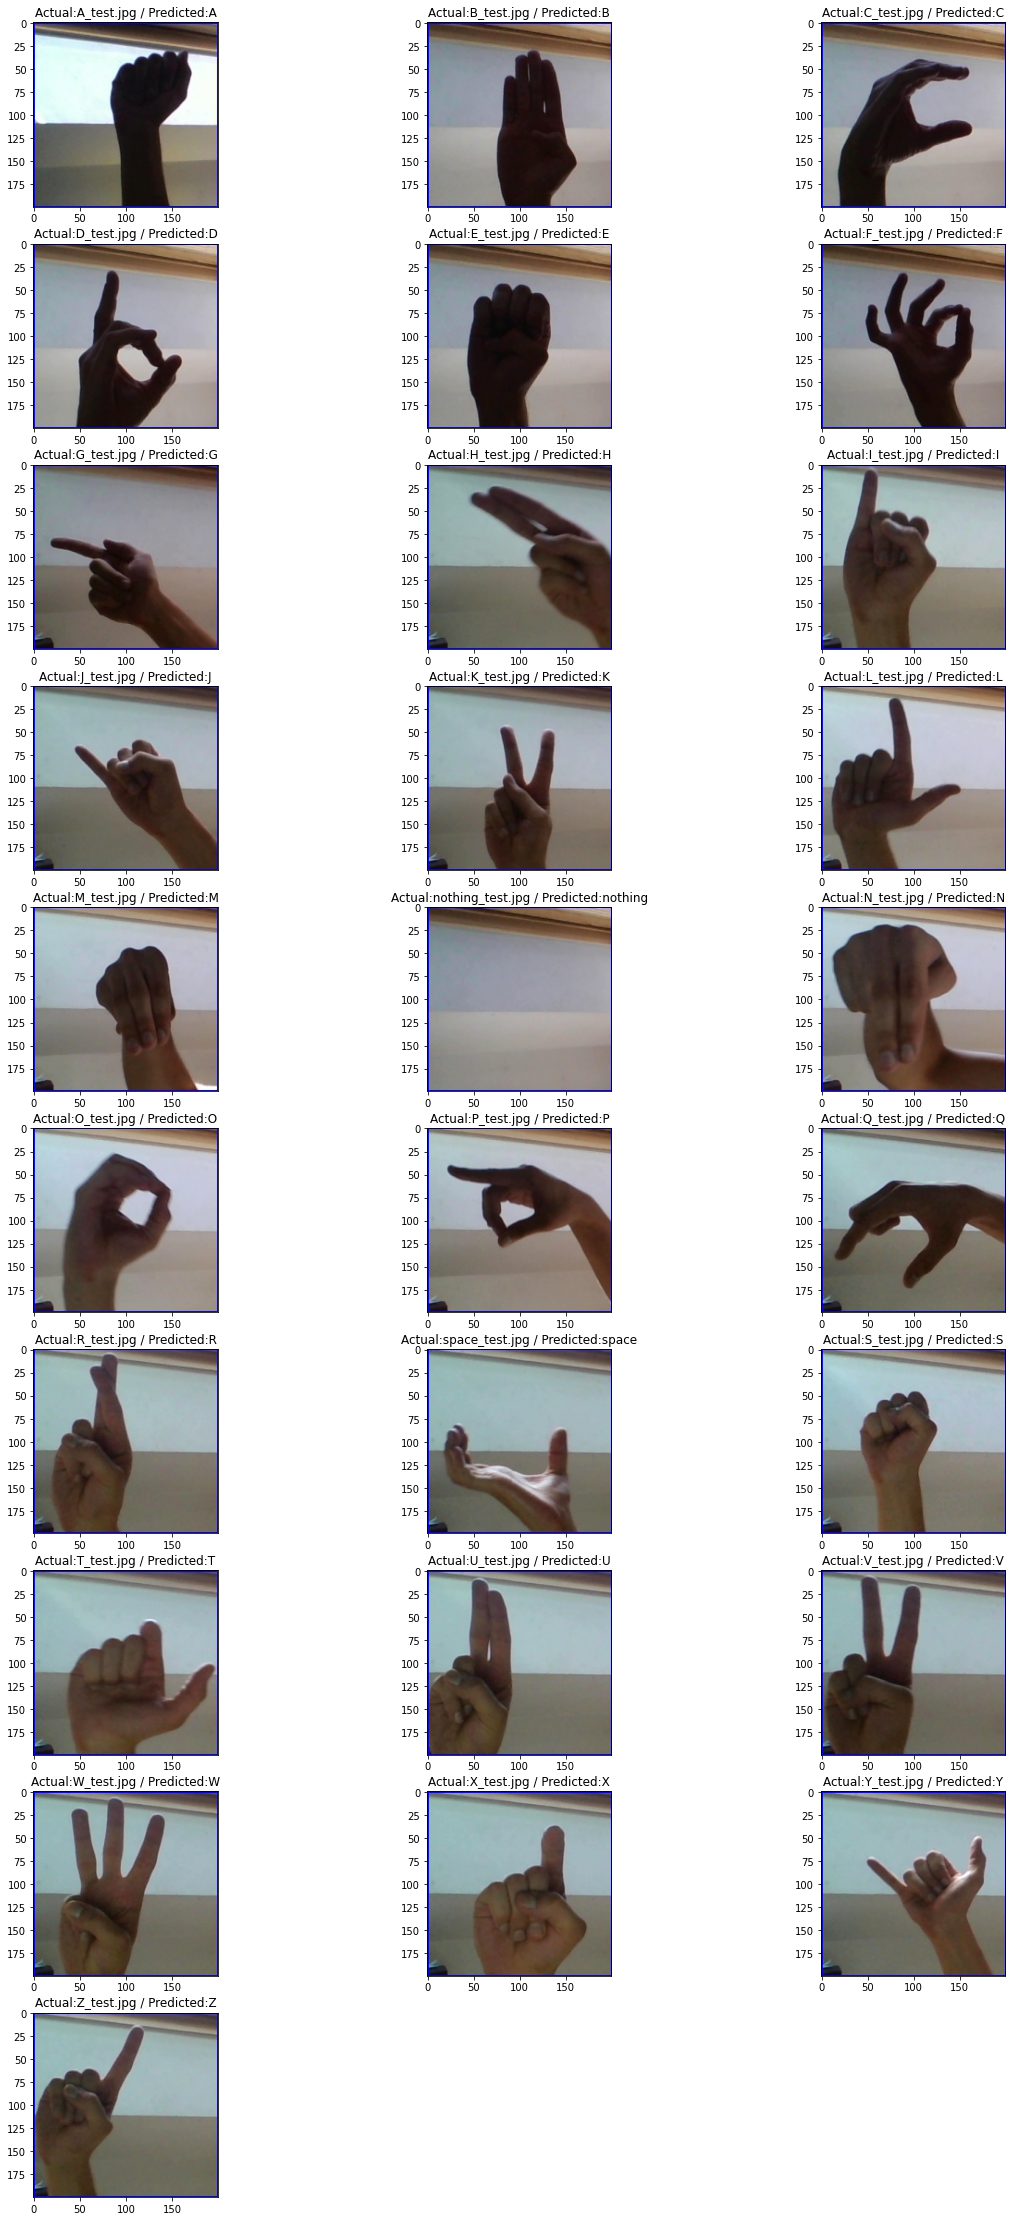

In [27]:
plt.figure(figsize=(20,40))
result=[]
for i in enumerate(os.listdir(test_path)):
    image = Image.open(test_path+'/'+i[1])
    image = np.asarray(image)
    image = image/255
    
    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)
    
    pred = np.argmax(model.predict(image.reshape(-1,200,200,3)))
    result.append(pred)
    for j in train_dataset.class_indices:
        if pred == train_dataset.class_indices[j]:
            prediction=j
        else:
            continue
    
    plt.title('Actual:{0} / Predicted:{1}'.format(i[1],prediction))

In [28]:
y_true=[0,1,2,3,4,5,6,7,8,9,10,11,12,27,13,14,15,16,17,28,18,19,20,21,22,23,24,25]

In [29]:
result

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 27,
 13,
 14,
 15,
 16,
 17,
 28,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [30]:
from sklearn.metrics import roc_curve, precision_score, recall_score, accuracy_score, f1_score

In [31]:
print('precision: ', precision_score(y_true, result ,average='weighted'), '\n', 'recall: ', recall_score(y_true, result, average='weighted'), '\n', 'f1 score:', f1_score(y_true, result, average='weighted'),'\n', 'accuracy: ', accuracy_score(y_true, result))

precision:  1.0 
 recall:  1.0 
 f1 score: 1.0 
 accuracy:  1.0


# MobileNet

In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import random
import shutil
from tensorflow.keras.optimizers import Adam

Download the MobileNet architecture

In [58]:
mobile= keras.applications.mobilenet.MobileNet()

Model parameters values

In [59]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

Delete the last 6 layers

In [60]:
x = mobile.layers[-6].output
output=Dense(units=29, activation='softmax')(x)

Initialization of input and output values

In [61]:
model_mobile=Model(inputs=mobile.input, outputs=output)

I delete the first 23 Layers

In [62]:
for layer in model_mobile.layers[:-23]:
    layer.trainable=False

In [63]:
model_mobile.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [64]:
model_mobile.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model training

In [65]:
history_mobile=model_mobile.fit(train_dataset,validation_data=valid_dataset,
          epochs=5,
          verbose=2)

Epoch 1/5
28/28 - 6s - loss: 0.2016 - accuracy: 0.9552 - val_loss: 3.4130 - val_accuracy: 0.2345
Epoch 2/5
28/28 - 3s - loss: 1.8976e-04 - accuracy: 1.0000 - val_loss: 1.3172 - val_accuracy: 0.6138
Epoch 3/5
28/28 - 3s - loss: 1.0148e-04 - accuracy: 1.0000 - val_loss: 0.3538 - val_accuracy: 0.8897
Epoch 4/5
28/28 - 3s - loss: 6.1057e-05 - accuracy: 1.0000 - val_loss: 0.0733 - val_accuracy: 0.9759
Epoch 5/5
28/28 - 3s - loss: 5.1371e-05 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000


Accuracy, loss of validation and training

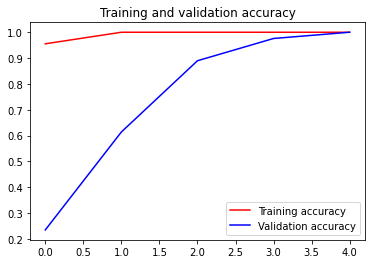

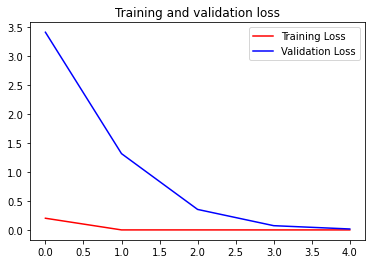

In [67]:
%matplotlib inline
acc = np.array(history_mobile.history['accuracy'])
val_acc = np.array(history_mobile.history['val_accuracy'])
loss = np.array(history_mobile.history['loss'])
val_loss = np.array(history_mobile.history['val_loss'])

epochs = np.arange(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()